- ch2,3에서 머신러닝 모델과 훈련 알고리즘을 블랙박스처럼 취급하여 회귀 시스템 최적화, 숫자 이미지 분류기 개선, 스팸 분류기를 처음부터 구축.
- 어떻게 작동하는지 이해->적절한 모델, 올바른 훈련 알고리즘, 작업에 맞는 좋은 하이퍼파라미터를 빠르게 찾을 수 있음 + 디버깅/에러 분석에 도움
- 선형 회귀 모델
  - 직접 계산할 수 있는 공식을 사용하여 훈련세트에 가장 잘 맞는 모델 파라미터를 해석적으로 구하기
  - 경사하강법(반복적 최적화 방식)을 사용하여 모델 파라미터를 조금씩 바꾸면서 비용 함수를 훈련 세트에 대해 최소화.
- 다항 회귀: 파라미터가 많아 훈련 데이터에 과대적합되기 쉬움. 
- 학습 곡선: 모델이 과대적합되는지 감지하는 방법
- 규제 기법: 과대적합 감소
- 분류에 이용되는 로지스틱 회귀, 소프트맥스 회귀
# 선형 회귀
- $\sum _0^n$ (입력 특성의 가중치합($x_n$) x 편향($\theta _n$)) = 선형 모델($\hat{y}$)
- $\hat{y} = h_\theta(x) = \theta x$: 특성 벡터x, 가설 함수h, 파라미터 벡터$\theta$
- 벡터를 열벡터로 나타냄 -> $\theta ^T x$ 행렬 곱셈.
- 모델 훈련 = 모델이 훈련 세트에 가장 잘 맞도록 모델 파라미터를 설정하는 것.
  - 모델이 훈련 데이터에 얼마나 잘 들어맞는지 측정
    - 회귀에서 가장 널리 사용되는 측정 지표= RMSE를 최소화하는 $\theta$를 찾기 -> MSE를 최소화하는 것이 같은 결과를 내면서 더 간단.
    - $MSE(X, h_\theta)=\frac {1}{m} \sum_{i=1}^m(\theta ^T x^{(i)} - y^{(i)})^2$ 
## 1. 정규방정식
- normal equation: 비용함수를 최소화하는 $\theta$값을 찾기 위한 해석적 방법
- 비용함수를 최소화하는 $\theta$ 값인 $\hat{\theta} = (X^T X)^{-1} X^T y$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
#무작위로 선형 데이터셋을 생성
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) #theta_0 = 4, theta_1 = 3, 가우시안잡음이 더해진 값(not rand())

X_b = np.c_[np.ones((100, 1)), X] #모든 샘플에 x0 = 1을 추가
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best 

array([[4.30252404],
       [2.83782486]])

In [10]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] #모든 샘플에 x0 = 1을 추가
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.30252404],
       [9.97817377]])

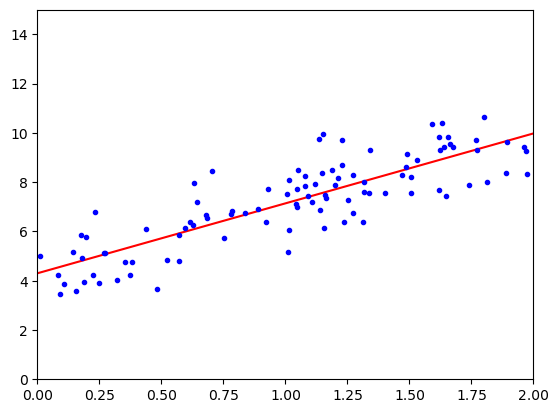

In [13]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()